# DBSCAN High Density Locating Regions

In [9]:
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
df = pd.read_csv('dataset1.csv')

In [11]:
df.shape

(768, 9)

**Preparación y estandarización de los datos**

Se estandarizan las características en X para que tengan una media de 0 y una desviación estándar de 1.

In [12]:
X, y = df.iloc[:, 0:-1].values, df.iloc[:, -1].values

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

**Visualización de clustering jerárquico con k-means y aglomerativo**

En primer lugar, se aplica k-means, que minimiza las distancias internas de cada cluster, para agrupar los datos en 3 clusters y graficar los resultados, donde se muestra la distribución de los datos según los clusters asignados.

Después, se aplica el clustering aglomerativo para agrupar los datos y graficar los resultados. Para ello, se utiliza un enfoque jerárquico para dividir los datos en 3 clusters usando enlace completo y métrica euclidiana, lo que facilita la comparación con k-means.

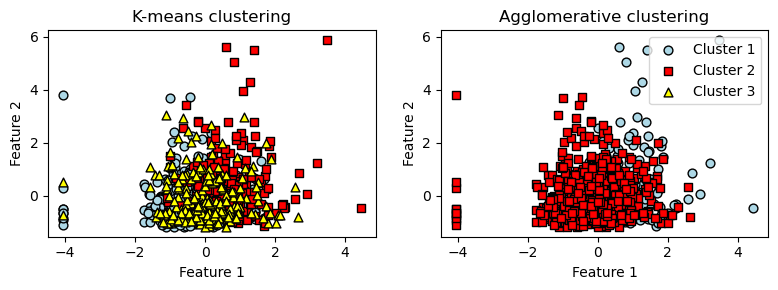

In [14]:
from sklearn.cluster import KMeans
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
km = KMeans(n_clusters=3, 
            random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='cluster 1')
ax1.scatter(X[y_km == 1, 0], 
            X[y_km == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='cluster 2')
ax1.scatter(X[y_km == 2, 0], 
            X[y_km == 2, 1],
            c='yellow',
            edgecolor='black',
            marker='^',
            s=40,
            label='cluster 3')
ax1.set_title('K-means clustering')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             metric='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')
ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')
ax2.scatter(X[y_ac == 2, 0],
            X[y_ac == 2, 1],
            c='yellow',
            edgecolor='black',
            marker='^',
            s=40,
            label='Cluster 3')
ax2.set_title('Agglomerative clustering')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

Como se puede observar en la gráfica de la izquierda, los 3 clusters muestran superposición entre la gran mayoría de los elementos de otros clusters. 

Sin embargo, en la gráfica de la derecha, se tiene una situación similar, con la diferencia de que los datos del cluster 3 se encuentran más dispersos que los datos de los clusters 1 y 2.

**Reducción dimensional**

Se reducen las dimensiones de X a dos componentes principales, lo que facilita la visualización de los datos en un espacio bidimensional.

Si los puntos de cada cluster están agrupados y separados visualmente, significa que se ha logrado una buena agrupación.

In [15]:
# PCA (Principal Component Analysis)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

**Visualización de clustering con DBSCAN**

Se aplica DBSCAN para identificar regiones de alta densidad y detectar posibles outliers. 

Este algoritmo identifica regiones densas y separa datos dispersos (outliers). 

Sus parámetros 'eps' (radio) y 'min_samples' (mínimo de puntos) controlan la densidad mínima necesaria para formar un cluster.

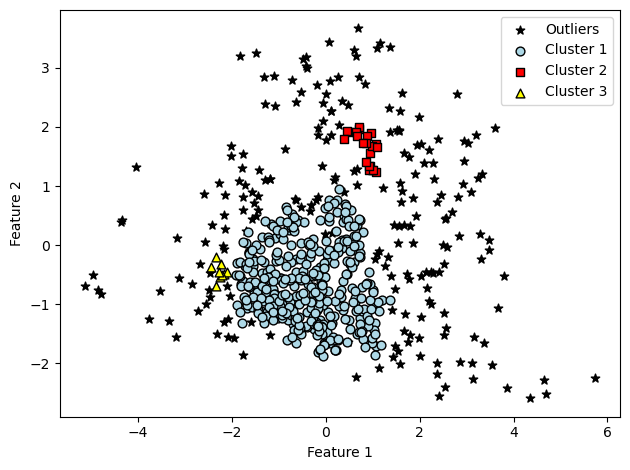

In [16]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')
y_db = db.fit_predict(X)

# PCA (Principal Component Analysis)
plt.scatter(X[y_db == -1, 0],
            X[y_db == -1, 1],
            c='black',
            edgecolor='black',
            marker='*',
            s=40,
            label='Outliers')
plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            c='lightblue',
            edgecolor='black',
            marker='o',
            s=40,
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            c='red',
            edgecolor='black',
            marker='s',
            s=40,
            label='Cluster 2')
plt.scatter(X[y_db == 2, 0],
            X[y_db == 2, 1],
            c='yellow',
            edgecolor='black',
            marker='^',
            s=40,
            label='Cluster 3')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.tight_layout()
plt.show()

Como se puede observar, las estrellas negras muestran aquellos puntos clasificados como outliers (-1), mientras que el resto de puntos se encuentran distribuidos en 3 clusters.